In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics 

In [8]:
pd.set_option('display.precision', 2)

In [9]:
df_pr = pd.read_csv('/content/drive/MyDrive/Colab Data/nyc-rolling-sales.csv')

In [30]:
df_pr

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE PER SQR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,1028.73
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,0.00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,0.00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,579.37
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,1733.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,174.76
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,231.38
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,307.49
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,182.37


In [10]:
df_pr['SALE PRICE'].replace({' -  ': 0}, inplace=True)
df_pr["SALE PRICE"] = pd.to_numeric(df_pr["SALE PRICE"])
df_pr['GROSS SQUARE FEET'].replace({' -  ': 0}, inplace=True)
df_pr["GROSS SQUARE FEET"] = pd.to_numeric(df_pr["GROSS SQUARE FEET"])

In [11]:
df_pr["PRICE PER SQR"] = df_pr['SALE PRICE']/df_pr['GROSS SQUARE FEET']

In [12]:
df_pr["PRICE PER SQR"].replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
df_pr["PRICE PER SQR"] = df_pr["PRICE PER SQR"].fillna(0)

In [14]:
df_cl = df_pr[['BOROUGH', 'PRICE PER SQR']]

In [15]:
df_cl["BOROUGH"].replace([1,2,3,4,5], ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# Removal Outlier Using Precentile

In [23]:
df_cl

,BOROUGH,PRICE PER SQR
0,Manhattan,1028.73
3,Manhattan,579.37
4,Manhattan,1733.48
6,Manhattan,755.52
9,Manhattan,876.32
...,...,...
84543,Staten Island,174.76
84544,Staten Island,231.38
84545,Staten Island,307.49
84546,Staten Island,182.37


In [24]:
df_cl["PRICE PER SQR"]

0        1028.73
3         579.37
4        1733.48
6         755.52
9         876.32
          ...   
84543     174.76
84544     231.38
84545     307.49
84546     182.37
84547      28.88
Name: PRICE PER SQR, Length: 29249, dtype: float64

In [20]:
min_t, max_t = df_cl["PRICE PER SQR"].quantile([0.001, 0.999])

In [25]:
df_cl = df_cl[(df_cl["PRICE PER SQR"]<max_t) & (df_cl["PRICE PER SQR"]>min_t)]

# Mean, Median & Mode

In [ ]:
#find the average, median, & modus price per sqr 
df_mean = df_cl["PRICE PER SQR"].mean()
df_median = df_cl["PRICE PER SQR"].median()

In [ ]:
df_mean

391.4195081984407

In [ ]:
df_median

342.96028880866425

# Range, Variance & Standard Deviation

In [ ]:
#Find variance of price per sqr 
df_var = df_cl["PRICE PER SQR"].var()

df_var

78989.42746375604

In [ ]:
#Find std deviation of price per sqr 
df_std = df_cl["PRICE PER SQR"].std()

df_std

281.0505781238602

In [ ]:
#Find range of price per sqr 
df_max = df_cl["PRICE PER SQR"].max()
df_min = df_cl["PRICE PER SQR"].min()
df_range = df_max-df_min

df_range

3005.319146752602

# Probabilty Distribution

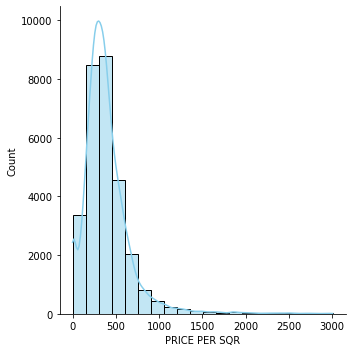

In [ ]:
#Find Probability Distribution
sns.displot(df_cl['PRICE PER SQR'], 
            bins=20, 
            kde=True,
            color='skyblue',
            height=5
           )

# Confidence Interval

In [72]:
#We are going to construct a CI for price per sq in Manhattan area
df_cl_man = df_cl[df_cl["BOROUGH"]== "Manhattan"]

In [81]:
#mean price per sq in Manhattan area
mean_manh = df_cl_man.mean()

In [78]:
#std price per sq in Manhattan area
sd = df_cl_man.std()

In [74]:
df_cl.value_counts().sum()

29249

In [82]:
#total number of Manhattan area
n = df_cl_man.value_counts().sum()
#z-score
z = 1.96

In [80]:
se = sd/np.sqrt(n)

In [88]:
lcb = mean_manh - z* se
ucb = mean_manh + z* se

In [89]:
ucb

PRICE PER SQR    844.16
dtype: float64

In [86]:
lcb 

PRICE PER SQR    760.14
dtype: float64

In [87]:
#The true mean of the price per sq of the Manhatan area will fall between 760.14 & 844.16

PRICE PER SQR    844.16
dtype: float64